In [63]:
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('/home/lodya/Projects/Term_Project_1/caption_search/meta_csv.csv', delimiter='\t')
df = df.dropna(how='all')
df.head()

,id,title,duration,categories,tags,description,playlist,subtitles,automatic_captions
1,--VYlmbkzNY,Simple model to understand r and g relationship,465.0,['Education'],[],Description\nMore free lessons at: http://www....,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?signatur...
2,-05OfTp6ZEE,Deficit and debt ceiling | American civics | U...,597.0,['Education'],[],"Basic of the deficit, debt and debt ceiling. C...",NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?v=-05OfT...
3,-0qEDcZZS9E,Vector components from initial and terminal po...,380.0,['Education'],[],Practice this lesson yourself on KhanAcademy.o...,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?xorp=Tru...
4,-1zR6pFof5c,Khan Academy in Idaho,174.0,['Education'],[],A 3-minute video highlighting educator feedbac...,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?asr_lang...
5,-2HwisGonfc,Adding vectors exercise example | Vectors | Pr...,89.0,['Education'],[],Practice this lesson yourself on KhanAcademy.o...,NaN,https://www.youtube.com/api/timedtext?lang=en&...,https://www.youtube.com/api/timedtext?hl=en&ca...


Всего на канале Khan Academy (https://www.youtube.com/user/khanacademy) на 25/05/2019 было загружено 7458 видео. Из них 7125 были снабжены субтитрами (не автоматическими) на английском языке в формате vtt (стандартный для канала формат). Автоматические субтитры имели 7398 видео. 31 видео не имели субтитров вообще.
Совокупная длина видеоматериала составила порядка 860 часов. Медианная длина ролика -- 6 минут 20 секунд.

In [120]:
df.shape

(7125, 9)

/home/lodya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


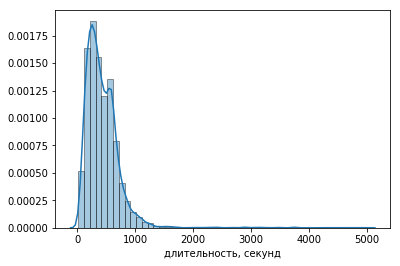

In [3]:
sns.distplot(df.dropna(how='all').duration, bins=50, hist_kws=dict(edgecolor="k", linewidth=1), axlabel='длительность, секунд')

In [4]:
print('Cummulative duration, hours:', '{:.1f}'.format(df.dropna(how='all').duration.sum() / 60 / 60))
print('Median length:', df.dropna(how='all').duration.median())
print('Mode length:', df.dropna(how='all').duration.mode()[0])

Cummulative duration, hours: 860.3
Median length: 379.0
Mode length: 240.0


При этом на одно видео приходится в среднем 159 строк субтитров. А средняя длительность одной строки составляет 2,6 секунд,8 слов и 42 символа.

In [5]:
df2 = pd.read_csv('/home/lodya/Projects/Term_Project_1/caption_search/plain_text.csv', delimiter='\t')
df2 = df2.dropna(how='any')
df2['number_of_symbols'] = df2.plain_text.str.len()
df2['number_of_words'] = df2.plain_text.str.split().apply(len)
df2.plain_text = df2.plain_text.str.replace('&lt;.*?&gt;', '')
df2.head()

,id,number_of_lines,plain_text,number_of_symbols,number_of_words
0,--VYlmbkzNY,193,- [Instructor] What I wanna do in this video i...,7449,1431
1,-05OfTp6ZEE,223,"Before we talk about the debt ceiling, it's im...",9530,1779
2,-0qEDcZZS9E,76,We can never have too much practice getting fa...,4339,669
3,-1zR6pFof5c,65,(hip hop music) Kelly: I've never seen this. T...,2658,509
4,-2HwisGonfc,31,Voiceover:Vectors A and B are drawn in the int...,1326,275


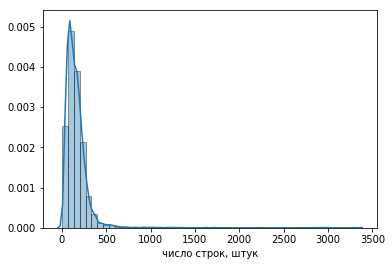

In [6]:
sns.distplot(df2.dropna(how='all').number_of_lines, bins=50, hist_kws=dict(edgecolor="k", linewidth=1), axlabel='число строк, штук')

In [7]:
print('Cummulative number_of_lines:', '{:.1f}'.format(df2.dropna(how='all').number_of_lines.sum()))
print('Median number_of_lines:', df2.dropna(how='all').number_of_lines.median())
print('Mean number_of_lines:', '{:.1f}'.format(df2.dropna(how='all').number_of_lines.mean()))
print('Mode number_of_lines:', df2.dropna(how='all').number_of_lines.mode()[0])

Cummulative number_of_lines: 1180734.0
Median number_of_lines: 136.0
Mean number_of_lines: 159.0
Mode number_of_lines: 97


In [8]:
print('Mean seconds per line:', '{:.1f}'.format(df.duration.sum() / df2.number_of_lines.sum()))
print('Mean symbols per line:', '{:.1f}'.format(df2.number_of_symbols.sum() / df2.number_of_lines.sum()))                                        

Mean seconds per line: 2.6
Mean symbols per line: 42.0


In [9]:
print('Total number of words: ', df2.number_of_words.sum())
print('Mean number_of_words:', '{:.1f}'.format(df2.dropna(how='all').number_of_words.mean()))
print('Mean words per line:', '{:.1f}'.format(df2.number_of_words.sum() / df2.number_of_lines.sum()))

Total number of words:  9600239
Mean number_of_words: 1292.4
Mean words per line: 8.1


#### Top/Stop

Чтобы установить долю контента, пригодную для поиска, общее количество слов делится на количество слов, оставшееся после удаления стопслов. Остается примерно 45%.
При обращении к списку 50 наиболее часто встречающихся слов после фильтрации, можно заметить, что в нем все еще присутсвую слова "going", "let", "could", "say", "get", "well", "like" и другие подобные, имеющие мало шансов оказаться в поисковом запросе. Тем не менее, задача удаления и этих слов представляется слишком кропотливой, а ее необходимость - открытым вопросом, который не рассматривается в курсовой работе.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
from nltk.corpus import stopwords
nltk.download('stopwords')
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to /home/lodya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
swe = stopwords.words('english')

def top_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def top_words_filtered(corpus, n=None):
    vec = CountVectorizer(stop_words=swe).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [51]:
word_count = top_words(df2.plain_text)
word_count_filtered = top_words_filtered(df2.plain_text)

In [54]:
print('Total number of words, no filtering', sum([x[1] for x in word_count]))
print('Total number of words, stop words filtered', sum([x[1] for x in word_count_filtered]))
print('Searchable', '{:.2f}'.format(sum([x[1] for x in word_count_filtered])/sum([x[1] for x in word_count])*100), '%')

Total number of words, no filtering 9025388
Total number of words, stop words filtered 4102875
Searchable 45.46 %


<IPython.core.display.Javascript object>


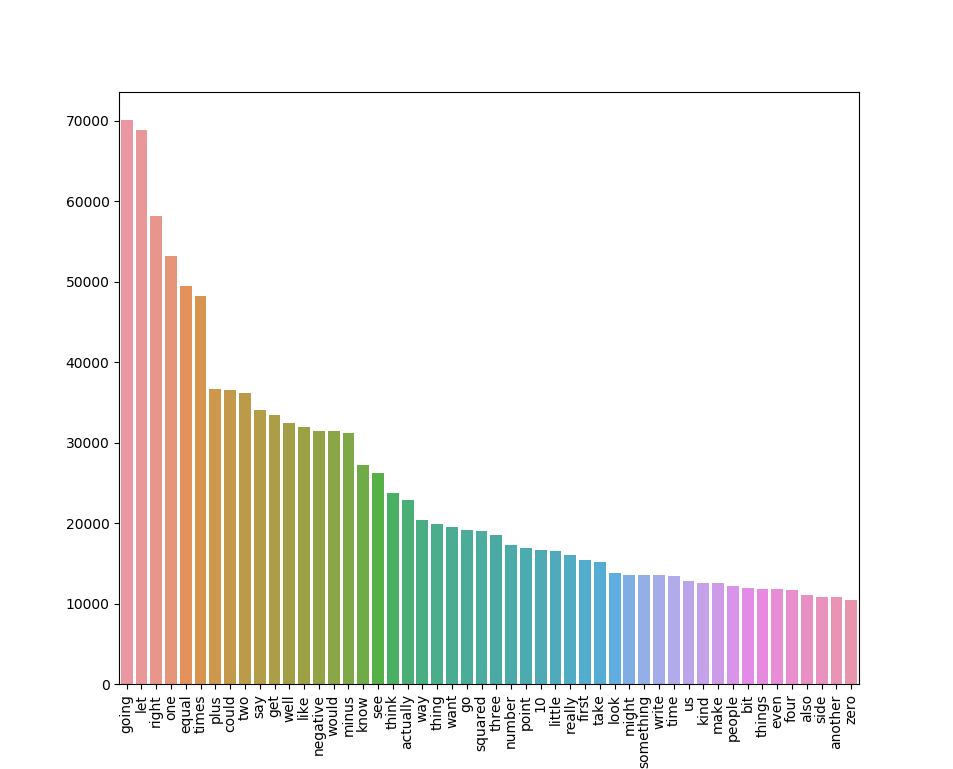

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

In [66]:
g = sns.barplot(x = [x[0] for x in word_count_filtered[:50]], y = [x[1] for x in word_count_filtered[:50]])
plt.xticks(rotation=90)

### Subtitles/Captions

In [121]:
import numpy as np

In [122]:
df3 = pd.read_csv('/home/lodya/Projects/Term_Project_1/caption_search/cpations.csv', delimiter='\t')

In [123]:
df3.shape

(7398, 3)

In [127]:
df_common = df2[['id', 'plain_text']].merge(df3[['id', 'plain_text']], on='id', how='inner', suffixes=('_subs', '_caps'))

In [128]:
df_common = df_common.dropna()

In [129]:
swe = stopwords.words('english')
vec = CountVectorizer(stop_words=swe).fit(df2.plain_text)

In [130]:
sims = sklearn.metrics.pairwise.cosine_similarity(vec.transform(df_common['plain_text_caps']), vec.transform(df_common['plain_text_subs']))
sims = np.diag(sims)

In [131]:
sims.mean()

0.7581686797475548